**Project Name - Netflix Movies and TV Shows Clustering**

*Importing Libraries*

In [1]:

# Importing basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
     

In [2]:
# Importing sklearn libraries
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
!pip install wordcloud

# Importing scipy library
import scipy.cluster.hierarchy as sch

# importing wordcloud library
from wordcloud import WordCloud, STOPWORDS

In [4]:

# Ignoring warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Loading the dataset
dataset = pd.read_csv("NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv")
dataset

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


**Data Inspection**

In [6]:
# Shape of the dataset
dataset.shape

(7787, 12)

In [7]:
# dataset information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


<Axes: >

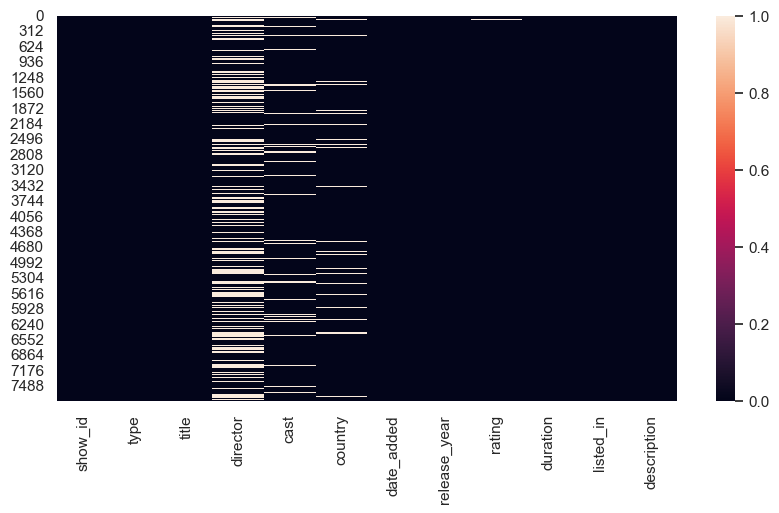

In [8]:
# Visualizing the null values by plotting heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(dataset.isnull())

**Understanding Variables/Features**

In [9]:

# Columns in the dataset
dataset.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [10]:

# Dataset Description
dataset.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


**FEATURE DESCRIPTION**

In [11]:
# Check Unique Values for each variable.
for i in dataset.columns.tolist():
  print(f"No. of unique values in {i} is {dataset[i].nunique()}")

No. of unique values in show_id is 7787
No. of unique values in type is 2
No. of unique values in title is 7787
No. of unique values in director is 4049
No. of unique values in cast is 6831
No. of unique values in country is 681
No. of unique values in date_added is 1565
No. of unique values in release_year is 73
No. of unique values in rating is 14
No. of unique values in duration is 216
No. of unique values in listed_in is 492
No. of unique values in description is 7769


**Data Cleaning**

In [12]:
# creating a copy of dataset
df = dataset.copy()

**Dropping Irrelevant Columns**

In [13]:
# Dropping irrelevant columns
df.drop(columns=['show_id'], axis=1, inplace=True)

In [14]:
# shape of dataset
df.shape

(7787, 11)

**Handling Missing Values**

In [15]:

def missing_values_info(data):
  '''
  This function returns the information about the missing values of a dataset
  '''
  column_names = data.columns
  missing_values = data.isnull().sum()
  missing_values_percent = round((data.isnull().sum()/data.shape[0])*100, 2)
  dataframe = pd.DataFrame({'columns': column_names,
                            'Null Values': missing_values.values,
                            'Null Values (%)': missing_values_percent})
  return dataframe.set_index('columns').sort_values('Null Values (%)', ascending=False)

In [16]:

# Missing values summary
missing_values_info(df)

,Null Values,Null Values (%)
columns,,
director,2389,30.68
cast,718,9.22
country,507,6.51
date_added,10,0.13
rating,7,0.09
type,0,0.00
title,0,0.00
release_year,0,0.00
duration,0,0.00


In [17]:
# dropping irrelevant columns
df.drop(['director', 'cast'], axis=1, inplace=True)

**date_added is a sensitive column as it is related to date of movie added on Netflix and there are only 10 observations where date_added contains NaN value. So, I will drop these 10 observations.**

In [18]:
# shape before dropping
df.shape

(7787, 9)

In [19]:

# dropping obervations where date_added have NaN values
df.dropna(subset=['date_added'], inplace=True)

**country and rating both columns are categorical in nature so I will replace NaN values with thier respective mode value.**

In [20]:
print(f"Mode value of country column: {df['country'].mode()[0]}")
print(f"Mode value of rating column: {df['rating'].mode()[0]}")

Mode value of country column: United States
Mode value of rating column: TV-MA


In [21]:

# replacing NaN values with mode
df['country'].fillna(df['country'].mode()[0], inplace=True)
df['rating'].fillna(df['rating'].mode()[0], inplace=True)

In [22]:

# Missing value count
df.isnull().sum()

type            0
title           0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

<Axes: >

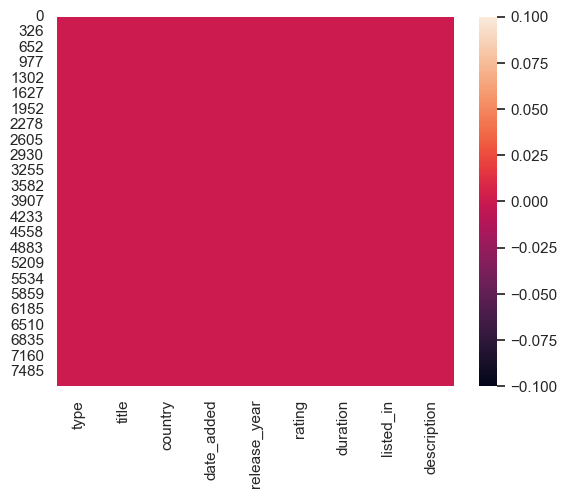

In [23]:

# visualizing missing value using heatmap
sns.heatmap(df.isnull())

Exploratory Data Analysis

What is EDA?

Exploratory Data Analysis(EDA), is one of the technique to extract vital features or treds that can be used by machine learning and deep learning models.
Why we perform EDA?

We need to perform EDA to get prior understanding of the given dataset before making any assumptions. It also help us to understand the relatioship between dependent and independent variables.

**Q1. When did the Netflix started growing ?**

In [24]:

# release_year value counts
df['release_year'].value_counts()

release_year
2018    1120
2017    1012
2019     996
2016     881
2020     868
        ... 
1925       1
1964       1
1966       1
1947       1
1959       1
Name: count, Length: 73, dtype: int64

In [25]:

# movies released after 2000
growth_year = df[df['release_year'] > 2000]

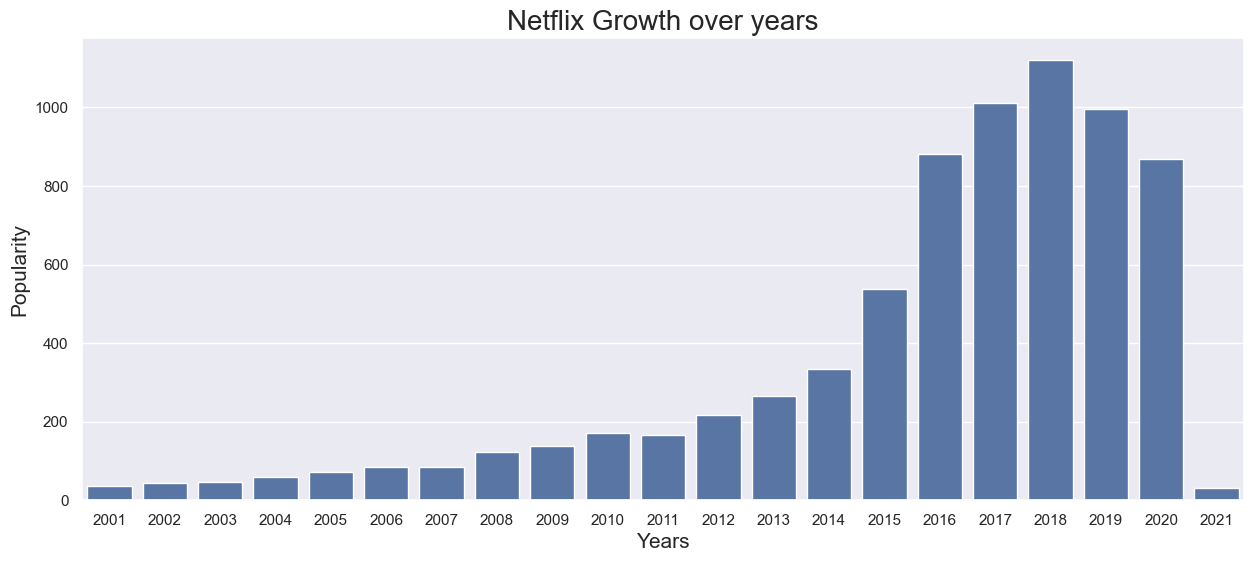

In [26]:
# setting the figure size
plt.figure(figsize=(15, 6))

# visualizing countplot
sns.countplot(data=growth_year, x='release_year')
plt.title("Netflix Growth over years", size=20)
plt.xlabel("Years", size=15)
plt.ylabel("Popularity", size=15)
plt.show()

Obervation from above graph:

Netflix started becomming popular after 2008.

After 2015, it get a boost in it's growth.

Now we all know that Netflix is one of the most famous OTT platform.

**Q2. What type of content people watching on Netflix over years ?**

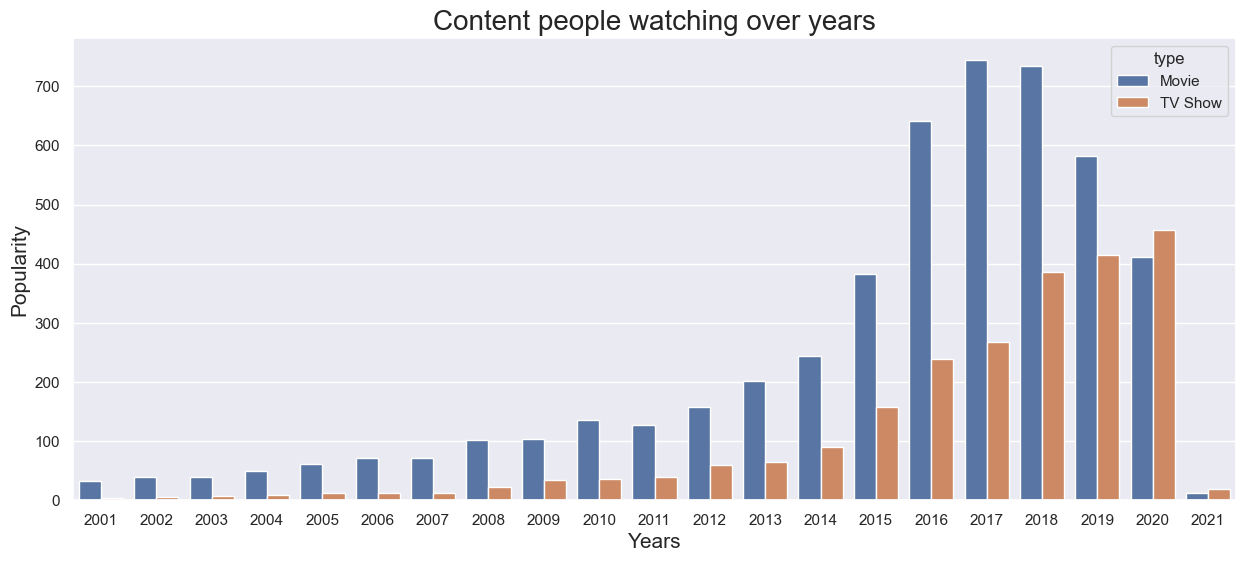

In [27]:
# setting the figure size
plt.figure(figsize=(15, 6))

# visualizing countplot
sns.countplot(data=growth_year, x='release_year', hue='type')
plt.title("Content people watching over years", size=20)
plt.xlabel("Years", size=15)
plt.ylabel("Popularity", size=15)
plt.show()

**Q3. What is the duration of Movies and TV Shows ?**

In [28]:
# movies
movies = df[df['type'] == 'Movie']['duration'].str.replace('min', '').astype('int64')

# tv shows
tv_shows = df[df['type'] == 'TV Show']['duration'].value_counts().reset_index().rename(columns={'index': 'No of seasons', 'duration': 'count'})
     

**Duration of Movies**

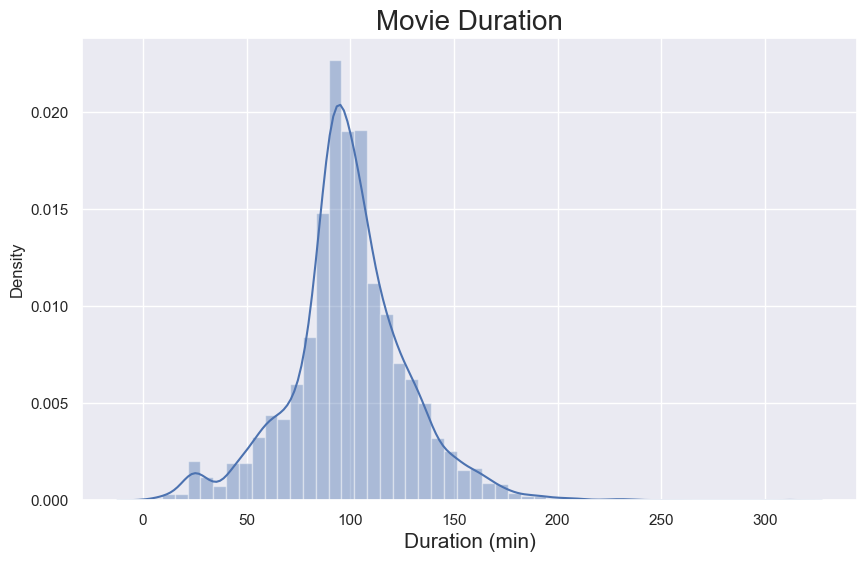

In [29]:
# setting the figure size
plt.figure(figsize=(10, 6))

# visualizing distribution plot
sns.distplot(movies)
plt.title("Movie Duration", size=20)
plt.xlabel("Duration (min)", size=15)
plt.show()

**Duration of TV Shows**

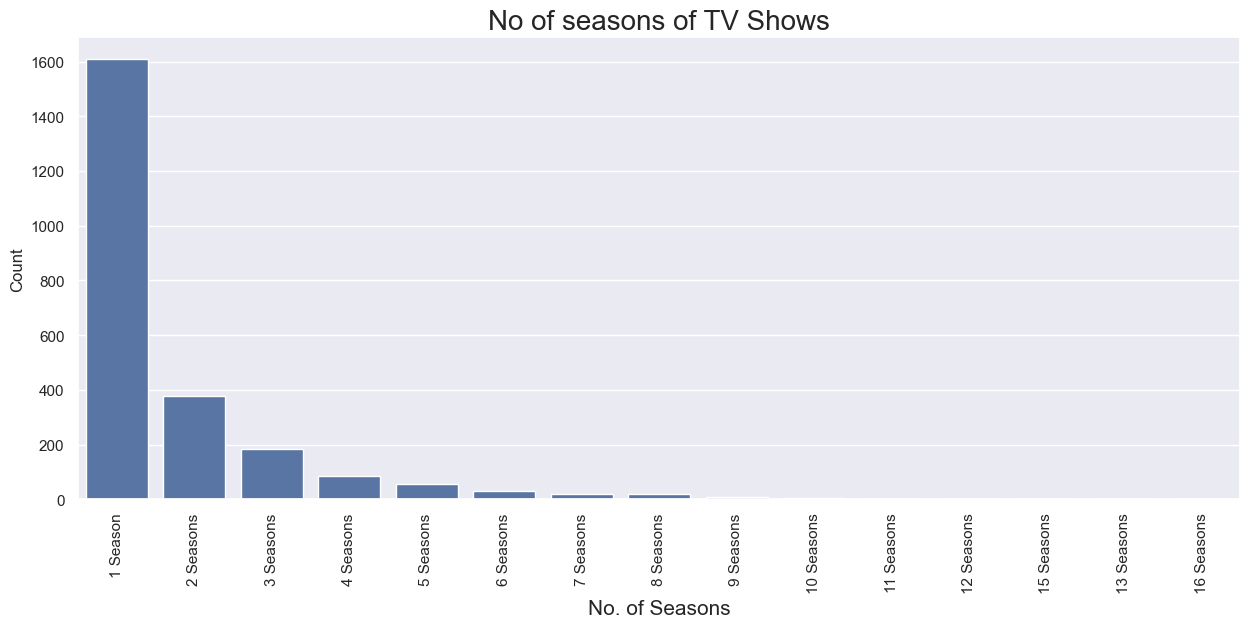

In [36]:
# setting the figure size
plt.figure(figsize=(15, 6))

tv_shows.columns = ['No of seasons', 'count']

# visualizing barplot plot
sns.barplot(data=tv_shows, x='No of seasons', y='count')
plt.title("No of seasons of TV Shows", size=20)
plt.xlabel("No. of Seasons", size=15)
plt.ylabel("Count")
plt.xticks(rotation='vertical')
plt.show()

Observation from above graph:
Most of the TV Shows have only 1 & 2 seasons.
There are very few TV Shows who have more than 5 seasons.

**Q4. Which countries are contributing to Netflix ?**

In [37]:
def country_contribution_summary(data):
  '''
  This function returns the summary on contribution of countries
  '''
  # creating three empty list
  countries_lst = []
  tv_shows_lst = []
  movies_lst = []

  # appending country name to above lists accordingly
  for i in range(data.shape[0]):
    country = data['country'].iloc[i].split(',')
    for j in country:
      countries_lst.append(j.strip())
      if data['type'].iloc[i] == 'TV Show':
        tv_shows_lst.append(j.strip())
      elif data['type'].iloc[i] == 'Movie':
        movies_lst.append(j.strip())

  # creating a summary by counting the number of occurences
  summary = list(set([(i, countries_lst.count(i), tv_shows_lst.count(i), movies_lst.count(i)) for i in countries_lst]))
  return pd.DataFrame(summary, columns=['country', 'total_content', 'tv_shows', 'movies'])
     

In [38]:
# country contribution summary
country_df = country_contribution_summary(df)
country_df = country_df.sort_values('total_content', ascending=False).reset_index().drop('index', axis=1)
country_df.head()

,country,total_content,tv_shows,movies
0,United States,3797,1136,2661
1,India,990,75,915
2,United Kingdom,722,255,467
3,Canada,412,126,286
4,France,349,84,265


**Total content contribution by top 10 countries.**

In [39]:
# top 10 countries contribution to netflix
top_10_countries = country_df.head(10)

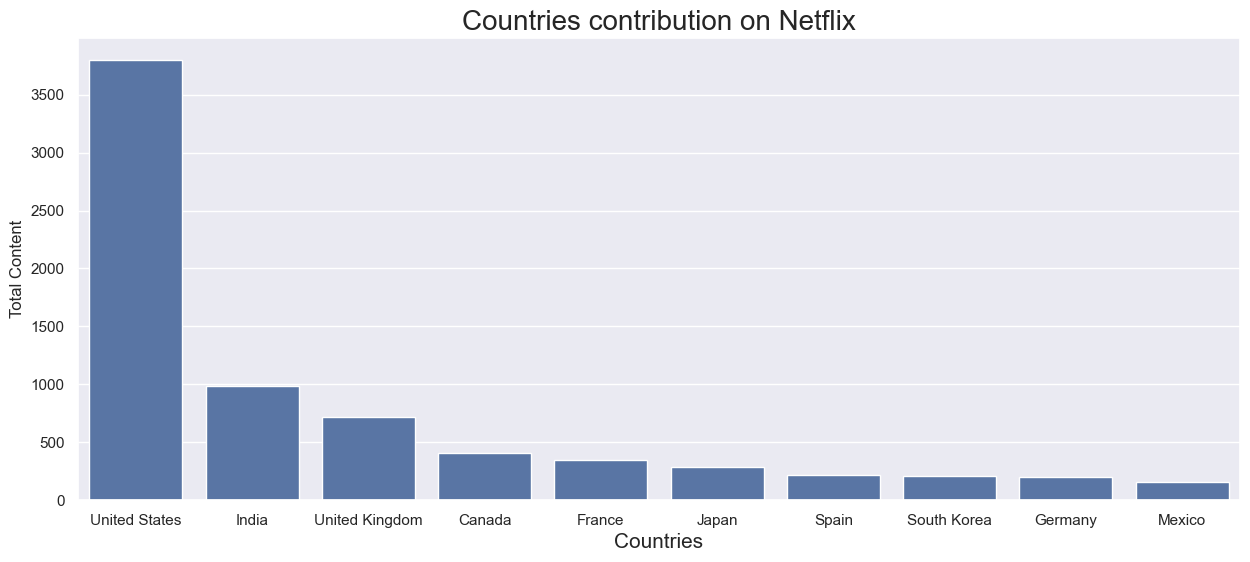

In [40]:
# setting the figure size
plt.figure(figsize=(15, 6))

# visualizing barplot plot
sns.barplot(data=top_10_countries, x='country', y='total_content')
plt.title("Countries contribution on Netflix", size=20)
plt.xlabel("Countries", size=15)
plt.ylabel("Total Content")
plt.show()

**Observation from above graph:**

**Movies & TV Shows contribution by top 10 countries**

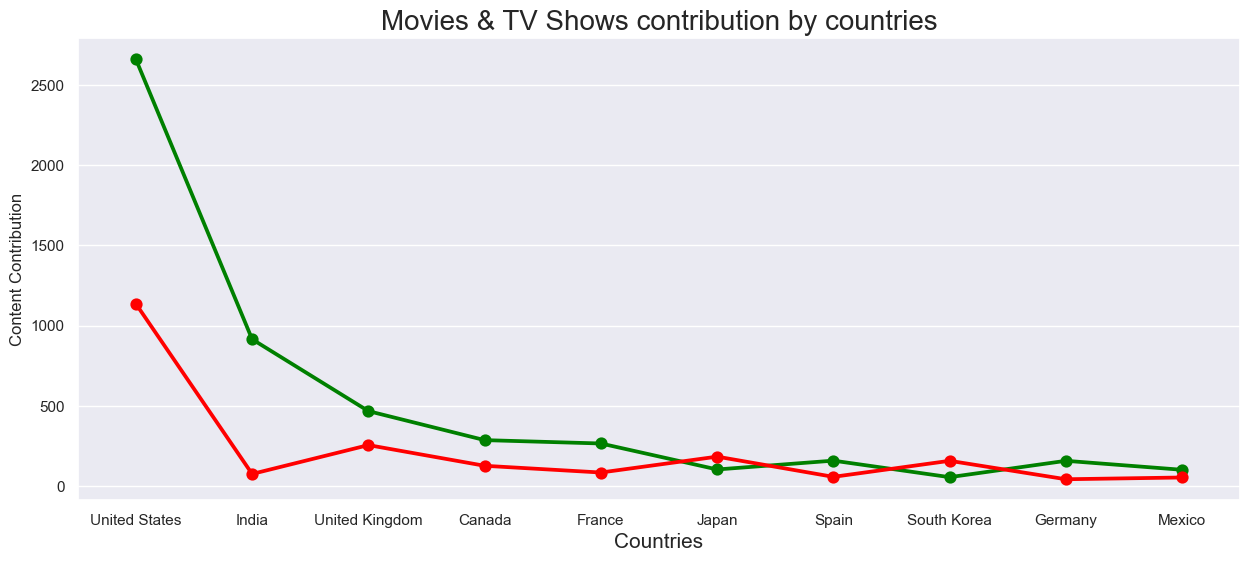

In [41]:
# setting the figure size
plt.figure(figsize=(15, 6))

# visualizing pointplot plot
sns.pointplot(data=top_10_countries, x='country', y='movies', color='green')
sns.pointplot(data=top_10_countries, x='country', y='tv_shows', color='red')
plt.title("Movies & TV Shows contribution by countries", size=20)
plt.xlabel("Countries", size=15)
plt.ylabel("Content Contribution")
plt.show()

**Observation from above graph:**

**Q5. What are the ratings of Movies and TV Shows ?**

In [44]:

# Movies
movies = df[df['type'] == 'Movie']['rating'].reset_index().drop('index', axis=1)

# TV Shows
tv_shows = df[df['type'] == 'TV Show']['rating'].reset_index().drop('index', axis=1)

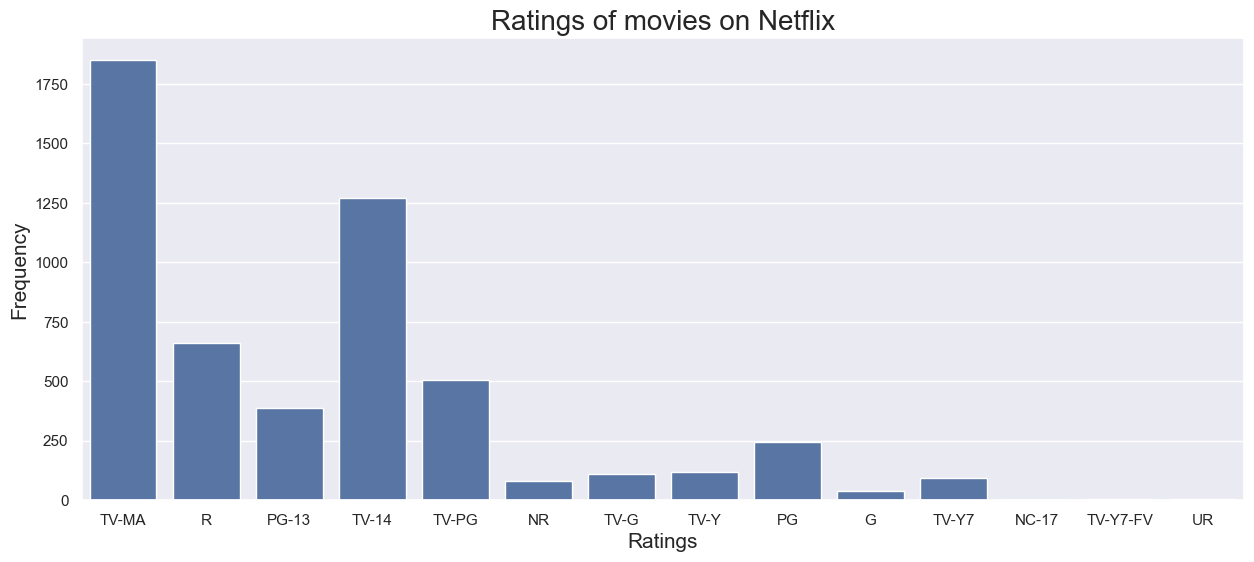

In [45]:
#Movies ratings


# setting the figure size
plt.figure(figsize=(15, 6))

# visualizing countplot plot
sns.countplot(data=movies, x='rating')
plt.title("Ratings of movies on Netflix", size=20)
plt.xlabel("Ratings", size=15)
plt.ylabel("Frequency", size=15)
plt.show()



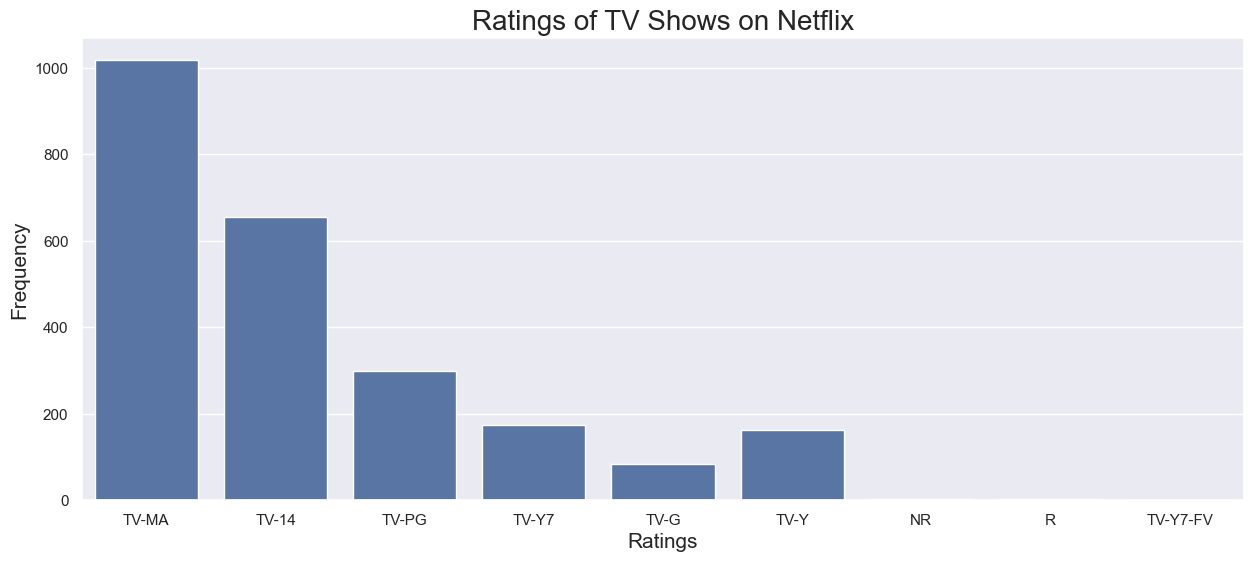

In [46]:
#TV Shows ratings

# setting the figure size
plt.figure(figsize=(15, 6))

# visualizing countplot plot
sns.countplot(data=tv_shows, x='rating')
plt.title("Ratings of TV Shows on Netflix", size=20)
plt.xlabel("Ratings", size=15)
plt.ylabel("Frequency", size=15)
plt.show()

**Full form of ratings:**

TV-MA ---> Mature Audience.
TV-14 ---> Audience above 14 years.
TV-PG ---> Parental Guidance Suggested.
PG-13 ---> Parents Strongly Cautioned.
TV-G ---> General Audience.
R ---> Restricted.

**Observation from above two graphs:**

**Q6. What are the genres of Movies and TV Shows on Netflix ?**

In [50]:
def genre_summary(data):
  '''
  This function returns the genres of movies and tv shows
  '''
  # creating an empty dictionary
  genre_dict = {}

  # getting the genres
  for i in range(data.shape[0]):
    genres = data['listed_in'].iloc[i].split(', ')
    for j in genres:
      if j in genre_dict:
        genre_dict[j] += 1
      else:
        genre_dict[j] = 1

  # creating two empty lists
  genre_lst = []
  occurence_lst = []

  # getting genres and their occurence
  for i, j in genre_dict.items():
    genre_lst.append(i)
    occurence_lst.append(j)
  
  return pd.DataFrame({'genres': genre_lst, 'count': occurence_lst}).sort_values('count', ascending=False).reset_index().drop('index', axis=1)
     

In [51]:
# movies
movies_data = df[df['type'] == 'Movie']

# Tv Shows
tv_shows_data = df[df['type'] == 'TV Show']

In [52]:
# Movies genres
movie_genres = genre_summary(movies_data)

# TV Shows genres
tv_shows_genres = genre_summary(tv_shows_data)

**Top 10 genres of movies on Netflix**

In [54]:

# top 10 movies genres
top_10_movie_genres = movie_genres.head(10)

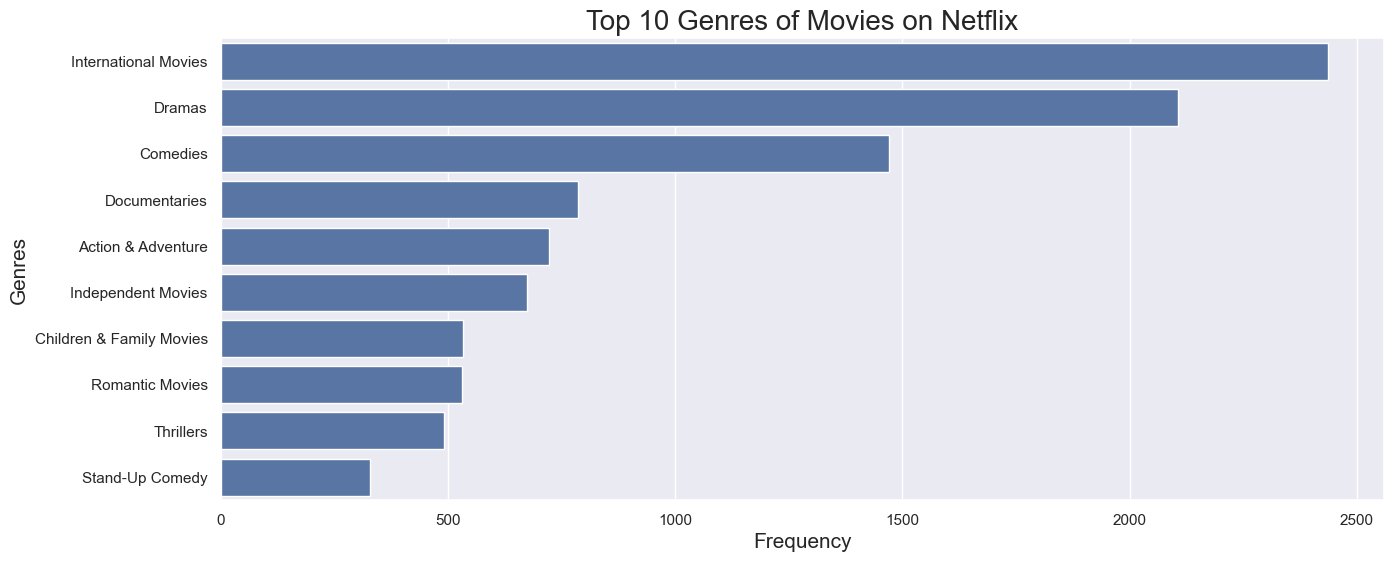

In [55]:
# setting the figure size
plt.figure(figsize=(15, 6))

# visualizing barplot
sns.barplot(data=top_10_movie_genres, y='genres', x='count')
plt.title("Top 10 Genres of Movies on Netflix", size=20)
plt.xlabel("Frequency", size=15)
plt.ylabel("Genres", size=15)
plt.show()

**Observation from above graph:**

**Top 10 genres of TV Shows on Netflix**

In [56]:
# top 10 tv shows genres
top_10_tv_shows_genres = tv_shows_genres.head(10)

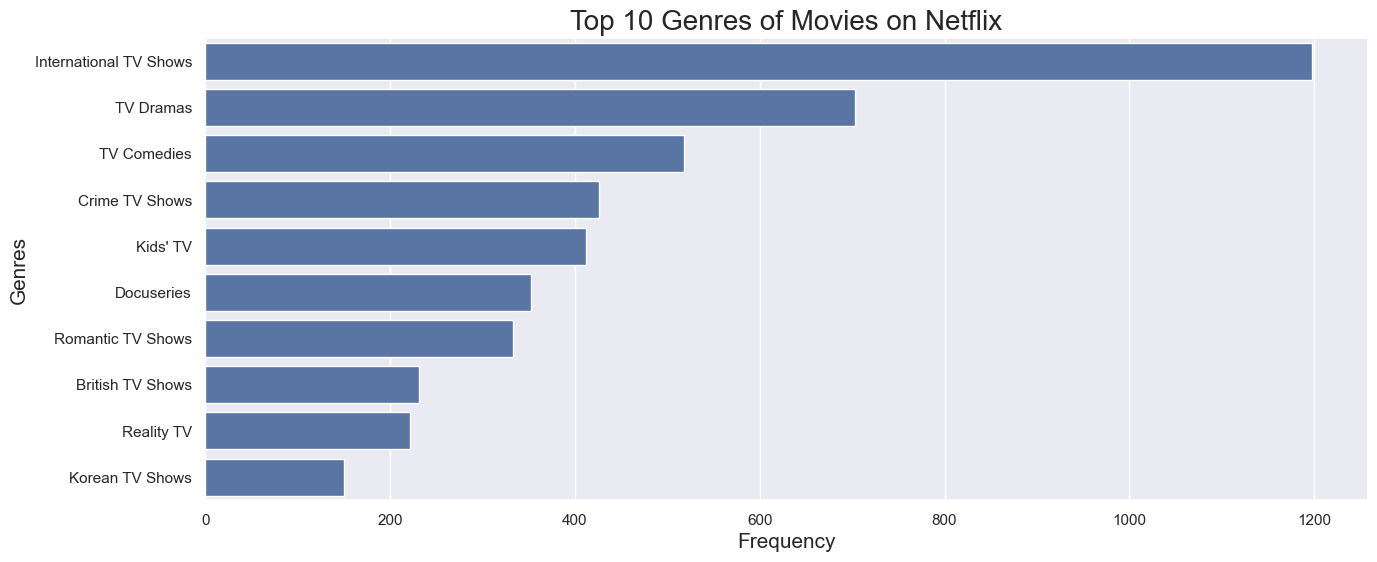

In [57]:
# setting the figure size
plt.figure(figsize=(15, 6))

# visualizing barplot
sns.barplot(data=top_10_tv_shows_genres, y='genres', x='count')
plt.title("Top 10 Genres of Movies on Netflix", size=20)
plt.xlabel("Frequency", size=15)
plt.ylabel("Genres", size=15)
plt.show()
     

**Observation from above graph:**

**Q7. In which month does most of the movies and tv shows added on Netflix ?**

In [59]:
# importing datetime
import datetime as dt

# creating a new column month_added
df['month_added'] = pd.to_datetime(df['date_added'].str.strip()).dt.month_name()
     

In [60]:
# unique values of month_added column
df['month_added'].unique()

array(['August', 'December', 'November', 'January', 'July', 'June',
       'April', 'October', 'May', 'March', 'September', 'February'],
      dtype=object)

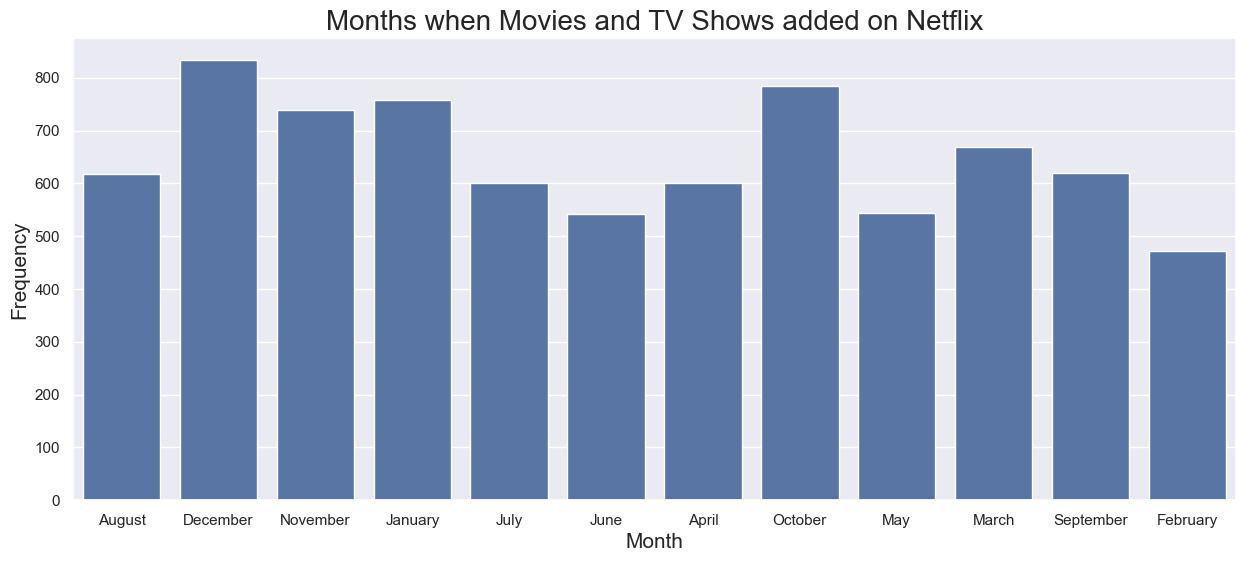

In [61]:

# setting the figure size
plt.figure(figsize=(15, 6))

# visualizing countplot
sns.countplot(data=df, x='month_added')
plt.title("Months when Movies and TV Shows added on Netflix", size=20)
plt.xlabel("Month", size=15)
plt.ylabel("Frequency", size=15)
plt.show()

**Observation from above graph:**

**Q8. What are the type of content available on Netflix ?**

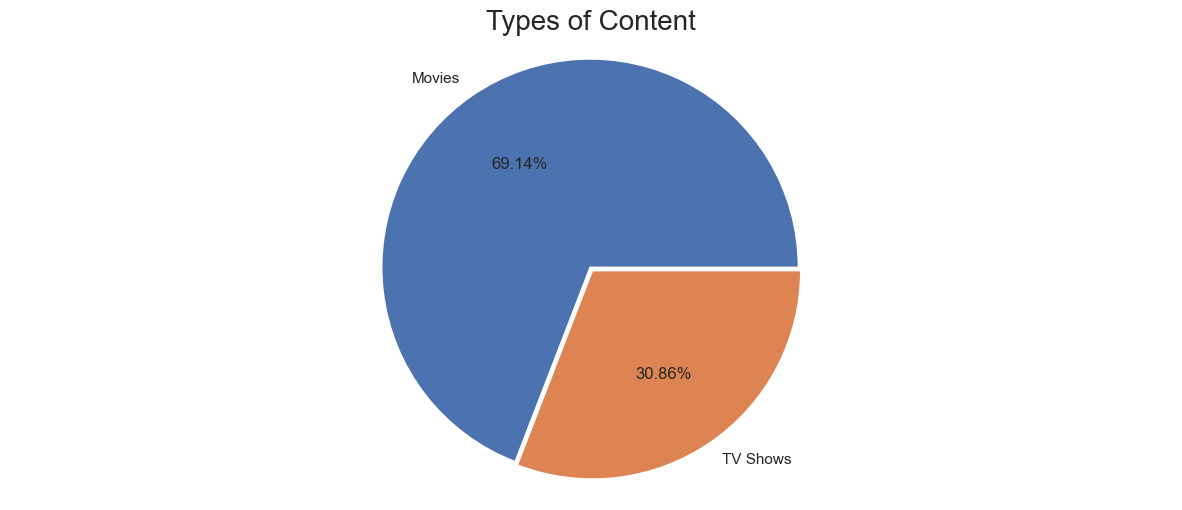

In [63]:

# setting the figure size
plt.figure(figsize=(15, 6))

# visualizing pie chart
plt.pie(df['type'].value_counts(), labels=['Movies', 'TV Shows'], explode=[0.01, 0.01], autopct='%1.2f%%')
plt.title("Types of Content", size=20)
plt.axis('equal')
plt.show()

**Observations from above pie chart:**

**Q9. What are the commons words in the title ?**

In [66]:
# movies
movies_df = df[df['type'] == 'Movie']

# tv shows
tv_shows_df = df[df['type'] == 'TV Show']

**Common words in Movie's title**

In [67]:
# getting words in the title of movies
word_cloud_df = movies_df['title']
words_in_title = ' '.join(word for word in word_cloud_df)
     

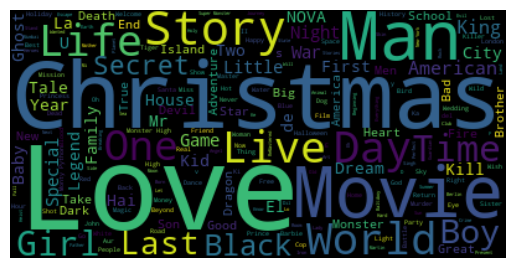

In [68]:

# stopwords
stop_words = set(STOPWORDS)

# Generating wordcloud image
wordcloud = WordCloud(stopwords=stop_words, background_color='black').generate(words_in_title)

# visualizing wordcloud image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

**Observations from above Image**

In movies, words like Love, Christmas, Story, World, Live, Day are very common.

**Common words in TV Show's title**

In [69]:

# getting words in the title of tv shows
word_cloud_df = tv_shows_df['title']
words_in_title = ' '.join(word for word in word_cloud_df)

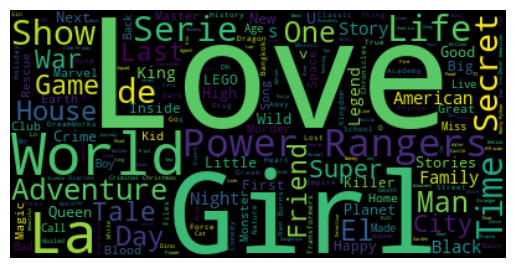

In [70]:
# stopwords
stop_words = set(STOPWORDS)

# Generating wordcloud image
wordcloud = WordCloud(stopwords=stop_words, background_color='black').generate(words_in_title)

# visualizing wordcloud image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
     


**Observation from above image:**

In Tv Shows, words like Love, Girl, World, La, Stories, Tale are very common.

**Data Pre-processing**

In [74]:
# creating a copy of dataset
data = df.copy()
     

**Feature Encoding**
  
*Applying one hot encoding on type column because it is nominal in nature.*

In [76]:

def one_hot_encoding(data, var_name):
  '''
  This function do one hot encoding on a specific column
  '''
  data = pd.concat([data, pd.get_dummies(data[var_name], prefix=var_name, drop_first=True)], axis=1)
  data = data.drop(var_name, axis=1)
  return data
     

In [77]:


# Applying one hot encoding
data = one_hot_encoding(data, 'type')


# now data lookslike
data.head()

,title,country,date_added,release_year,rating,duration,listed_in,description,month_added,type_TV Show
0,3%,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,August,True
1,7:19,Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,December,False
2,23:59,Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",December,False
3,9,United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",November,False
4,21,United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,January,False


**Text Preprocessing**

*Removing Punctuation*

In [78]:
def remove_punctuation(text):
  '''
  This function remove punctuation marks from a text
  '''
  no_punc_text = ''.join([char.lower() for char in text if char not in string.punctuation])
  return no_punc_text

In [80]:
import string
# removing punctuation marks
data['listed_in'] = data['listed_in'].apply(remove_punctuation)
data['description'] = data['description'].apply(remove_punctuation)

**Removing Stopwords**

In [82]:
def remove_stopwords(text):
  '''
  This function remove stopwords from the text
  '''
  no_stopword = ' '.join([word for word in text.split() if word not in stopwords.words('english')])
  return no_stopword

In [84]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

# removing stopwords
data['listed_in'] = data['listed_in'].apply(remove_stopwords)
data['description'] = data['description'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sunil\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


**Counting the vocabulary words using CountVectorizer**

In [86]:
def count_vocab_words(data, col_name):
  '''
  This function returns the vocabulary words counts in a text
  '''
  # instatiating CountVectorizer class
  count_vectorizer = CountVectorizer()
  # fitting the count vectorizer
  count_vectorizer.fit(data[col_name])
  return count_vectorizer.vocabulary_.items()

In [87]:
# counting the vocabulary
listed_in_vocab_items = count_vocab_words(data, 'listed_in')
description_vocab_items = count_vocab_words(data, 'description')

**listed_in**

In [89]:
print("Total Vocabulary words: ", len(listed_in_vocab_items))
print("The Vocab Words are : ")
print(listed_in_vocab_items)

Total Vocabulary words:  42
The Vocab Words are : 
dict_items([('international', 19), ('tv', 41), ('shows', 33), ('dramas', 12), ('scifi', 31), ('fantasy', 15), ('movies', 23), ('horror', 17), ('action', 0), ('adventure', 1), ('independent', 18), ('mysteries', 26), ('thrillers', 40), ('crime', 8), ('docuseries', 11), ('documentaries', 10), ('sports', 36), ('comedies', 6), ('anime', 2), ('series', 32), ('reality', 28), ('romantic', 29), ('science', 30), ('nature', 27), ('british', 3), ('korean', 21), ('music', 24), ('musicals', 25), ('lgbtq', 22), ('faith', 13), ('spirituality', 35), ('kids', 20), ('spanishlanguage', 34), ('children', 4), ('family', 14), ('classic', 5), ('cult', 9), ('standup', 37), ('comedy', 7), ('talk', 38), ('teen', 39), ('features', 16)])


In [90]:
# Top 10 words occured in genres
pd.DataFrame(listed_in_vocab_items, columns=['Word', 'Occurence']).sort_values('Occurence', ascending=False).set_index('Word').head(10)

,Occurence
Word,
tv,41
thrillers,40
teen,39
talk,38
standup,37
sports,36
spirituality,35
spanishlanguage,34
shows,33


In [91]:
print("Total Vocabulary words: ", len(description_vocab_items))
print("The Vocab Words are : ")
print(description_vocab_items)

Total Vocabulary words:  19594
The Vocab Words are : 
dict_items([('future', 7153), ('elite', 5642), ('inhabit', 8945), ('island', 9221), ('paradise', 12668), ('far', 6398), ('crowded', 4230), ('slums', 16086), ('get', 7349), ('one', 12297), ('chance', 3060), ('join', 9439), ('saved', 15190), ('squalor', 16502), ('devastating', 4825), ('earthquake', 5491), ('hits', 8306), ('mexico', 11098), ('city', 3326), ('trapped', 17904), ('survivors', 17050), ('walks', 18862), ('life', 10168), ('wait', 18839), ('rescued', 14507), ('trying', 18046), ('desperately', 4778), ('stay', 16611), ('alive', 781), ('army', 1222), ('recruit', 14227), ('found', 6937), ('dead', 4492), ('fellow', 6524), ('soldiers', 16211), ('forced', 6873), ('confront', 3780), ('terrifying', 17426), ('secret', 15378), ('thats', 17480), ('haunting', 8010), ('jungle', 9534), ('training', 17861), ('camp', 2751), ('postapocalyptic', 13347), ('world', 19299), ('ragdoll', 13946), ('robots', 14833), ('hide', 8185), ('fear', 6477), ('d

In [92]:
# Top 10 words occured in description
pd.DataFrame(description_vocab_items, columns=['Word', 'Occurence']).sort_values('Occurence', ascending=False).set_index('Word').head(10)
     

,Occurence
Word,
şeref,19593
ōarai,19592
łukasz,19591
überelite,19590
über,19589
ömer,19588
émile,19587
ángel,19586
álvaro,19585


**Applying Lemmanization or Stemming**

In [95]:
from nltk.stem import SnowballStemmer
import nltk
nltk.download('punkt')


def stemming(text):
  '''
  This function apply stemming on text
  '''
  stemmer = SnowballStemmer('english')
  stemmed_text = ' '.join([stemmer.stem(word) for word in text.split()])
  return stemmed_text

# Applying stemming
data['listed_in'] = data['listed_in'].apply(stemming)
data['description'] = data['description'].apply(stemming)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sunil\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


In [96]:

print(data['listed_in'].iloc[0])
print(data['description'].iloc[0])
     

intern tv show tv drama tv scifi fantasi
futur elit inhabit island paradis far crowd slum get one chanc join 3 save squalor


**Again Counting vocabulary words after stemming**

In [97]:
# counting the vocabulary
listed_in_vocab_items = count_vocab_words(data, 'listed_in')
description_vocab_items = count_vocab_words(data, 'description')

**listed_in**

In [99]:

print("Total Vocabulary words: ", len(listed_in_vocab_items))
print("The Vocab Words are : ")
print(listed_in_vocab_items)

Total Vocabulary words:  40
The Vocab Words are : 
dict_items([('intern', 18), ('tv', 39), ('show', 31), ('drama', 11), ('scifi', 29), ('fantasi', 14), ('movi', 22), ('horror', 16), ('action', 0), ('adventur', 1), ('independ', 17), ('mysteri', 24), ('thriller', 38), ('crime', 7), ('docuseri', 10), ('documentari', 9), ('sport', 34), ('comedi', 6), ('anim', 2), ('seri', 30), ('realiti', 26), ('romant', 27), ('scienc', 28), ('natur', 25), ('british', 3), ('korean', 20), ('music', 23), ('lgbtq', 21), ('faith', 12), ('spiritu', 33), ('kid', 19), ('spanishlanguag', 32), ('children', 4), ('famili', 13), ('classic', 5), ('cult', 8), ('standup', 35), ('talk', 36), ('teen', 37), ('featur', 15)])


In [100]:
# Top 10 words occured in genres after stemming
pd.DataFrame(listed_in_vocab_items, columns=['Word', 'Occurence']).sort_values('Occurence', ascending=False).set_index('Word').head(10)
     

,Occurence
Word,
tv,39
thriller,38
teen,37
talk,36
standup,35
sport,34
spiritu,33
spanishlanguag,32
show,31


In [101]:

print("Total Vocabulary words: ", len(description_vocab_items))
print("The Vocab Words are : ")
print(description_vocab_items)

Total Vocabulary words:  14241
The Vocab Words are : 
dict_items([('futur', 5120), ('elit', 4104), ('inhabit', 6479), ('island', 6648), ('paradis', 9343), ('far', 4577), ('crowd', 3135), ('slum', 11667), ('get', 5273), ('one', 9068), ('chanc', 2358), ('join', 6830), ('save', 11024), ('squalor', 11975), ('devast', 3534), ('earthquak', 3994), ('hit', 6028), ('mexico', 8135), ('citi', 2565), ('trap', 12960), ('survivor', 12363), ('walk', 13678), ('life', 7419), ('wait', 13666), ('rescu', 10542), ('tri', 12989), ('desper', 3506), ('stay', 12057), ('aliv', 632), ('armi', 972), ('recruit', 10386), ('found', 4957), ('dead', 3330), ('fellow', 4667), ('soldier', 11765), ('forc', 4910), ('confront', 2855), ('terrifi', 12633), ('secret', 11154), ('that', 12664), ('haunt', 5804), ('jungl', 6901), ('train', 12940), ('camp', 2132), ('postapocalypt', 9818), ('world', 13996), ('ragdol', 10205), ('robot', 10735), ('hide', 5947), ('fear', 4636), ('danger', 3276), ('machin', 7697), ('extermin', 4487), ('

In [102]:
# Top 10 words occured in description after stemming
pd.DataFrame(description_vocab_items, columns=['Word', 'Occurence']).sort_values('Occurence', ascending=False).set_index('Word').head(10)
     

,Occurence
Word,
şeref,14240
ōarai,14239
łukasz,14238
überelit,14237
über,14236
ömer,14235
émile,14234
ángel,14233
álvaro,14232


**Creating features for clustering**

In [104]:
# creating column containing the length of preprocessed words in listed_in and description
data['genres_length'] = data['listed_in'].apply(lambda x: len(x))
data['description_length'] = data['description'].apply(lambda x: len(x))

In [105]:
# top 5 records
data.head()

,title,country,date_added,release_year,rating,duration,listed_in,description,month_added,type_TV Show,genres_length,description_length
0,3%,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,intern tv show tv drama tv scifi fantasi,futur elit inhabit island paradis far crowd sl...,August,True,40,82
1,7:19,Mexico,"December 23, 2016",2016,TV-MA,93 min,drama intern movi,devast earthquak hit mexico citi trap survivor...,December,False,17,88
2,23:59,Singapore,"December 20, 2018",2011,R,78 min,horror movi intern movi,armi recruit found dead fellow soldier forc co...,December,False,23,102
3,9,United States,"November 16, 2017",2009,PG-13,80 min,action adventur independ movi scifi fantasi,postapocalypt world ragdol robot hide fear dan...,November,False,43,89
4,21,United States,"January 1, 2020",2008,PG-13,123 min,drama,brilliant group student becom cardcount expert...,January,False,5,99


In [106]:
# selecting features for clustering
clustering_df = data[['type_TV Show', 'genres_length', 'description_length']]
clustering_df.head()
     

,type_TV Show,genres_length,description_length
0,True,40,82
1,False,17,88
2,False,23,102
3,False,43,89
4,False,5,99


**Feature Scaling**

In [107]:

# scaling features with StandardScaker
scaler = StandardScaler()
scaler.fit(clustering_df)
X = scaler.transform(clustering_df)

In [108]:
X

array([[ 1.49680215,  1.46675528, -1.02211933],
       [-0.66809097, -0.68583605, -0.4651531 ],
       [-0.66809097, -0.12429048,  0.83443477],
       ...,
       [-0.66809097,  0.99880064,  0.27746854],
       [ 1.49680215,  0.06289137,  1.11291789],
       [-0.66809097, -0.12429048, -0.4651531 ]])

**ML Model Implementation**
*It is a Unsupervised Machine Learning problem because target variable is not present and in Unsupervised Learning, instead of doing prediction we generally do clustering.*

**Clustering: -**

**K Means Clustering**
*The most challenging part of clustering is to find the best value of K (number of clusters). To find the value of K we will use, Elbow method and Silhoutte Score.*

**Elbow Method**

In [109]:

# finding best value of K with Elbow method
wcss = []
range_n_clusters = range(1, 11)

for i in range_n_clusters:
  k_means = KMeans(n_clusters=i, init = 'k-means++', random_state = 42)
  k_means.fit(X)
  wcss.append(k_means.inertia_)

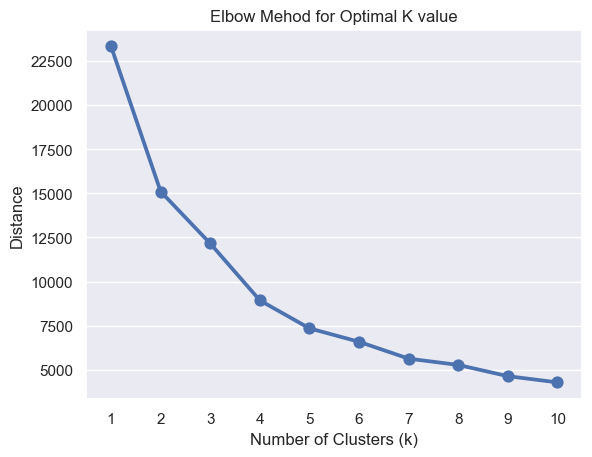

In [110]:
# visualizing for K value
sns.pointplot(x=list(range_n_clusters), y=wcss)
plt.title("Elbow Mehod for Optimal K value")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Distance")
plt.show()


**As we can see that the optimal value for K is 2.**

**Silhouette Score**


In [111]:
# finding optimal value for k with silhouette score
s_score = []
range_n_clusters = range(2, 12)

for i in range_n_clusters:
  k_means = KMeans(n_clusters=i, random_state=10)
  k_means.fit(X)
  labels = k_means.predict(X)
  s_score.append(round(silhouette_score(X, labels), 3))
  print(f"For cluster {i}, Silhouette Score is {round(silhouette_score(X, labels), 3)}")

For cluster 2, Silhouette Score is 0.427
For cluster 3, Silhouette Score is 0.317
For cluster 4, Silhouette Score is 0.316
For cluster 5, Silhouette Score is 0.371
For cluster 6, Silhouette Score is 0.365
For cluster 7, Silhouette Score is 0.357
For cluster 8, Silhouette Score is 0.351
For cluster 9, Silhouette Score is 0.358
For cluster 10, Silhouette Score is 0.348
For cluster 11, Silhouette Score is 0.347


For n_clusters = 2 The average silhouette_score is : 0.4273875015644387
For n_clusters = 3 The average silhouette_score is : 0.31743574107837425
For n_clusters = 4 The average silhouette_score is : 0.31631556784753945
For n_clusters = 5 The average silhouette_score is : 0.37079866451367616
For n_clusters = 6 The average silhouette_score is : 0.36492459994809695


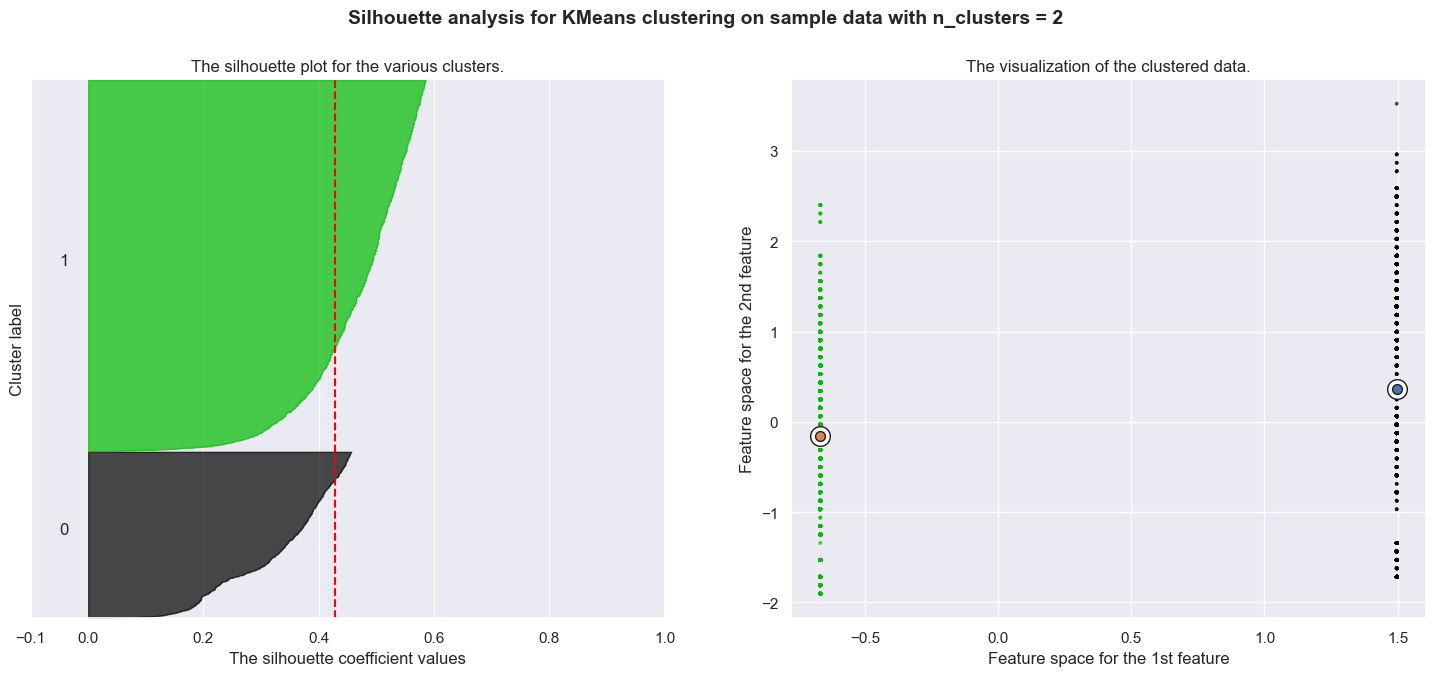

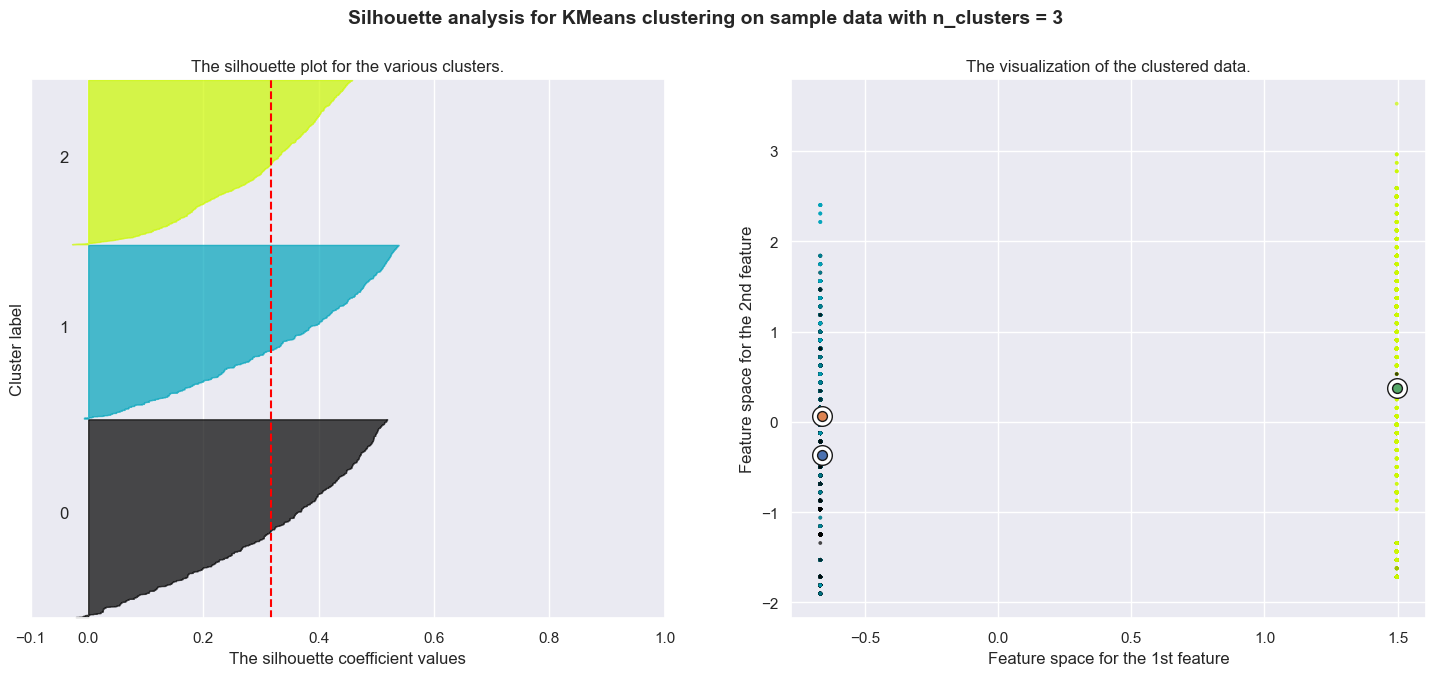

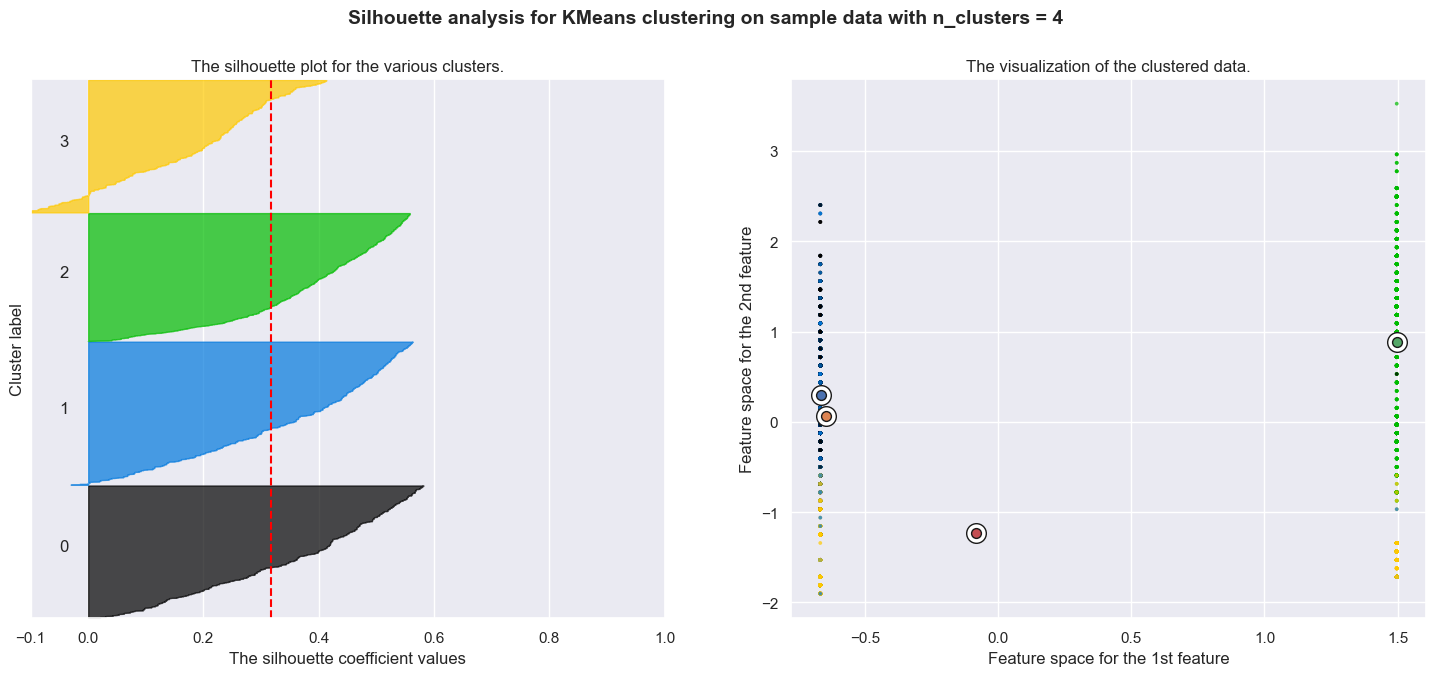

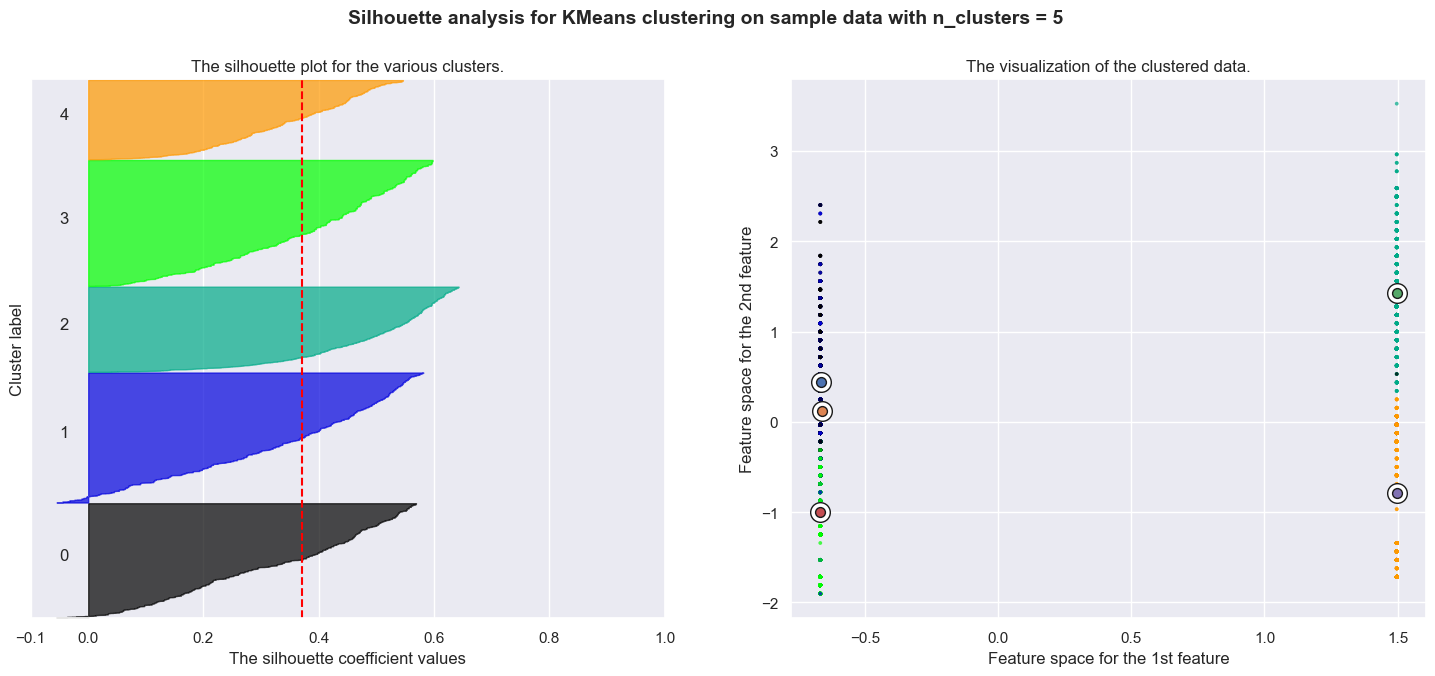

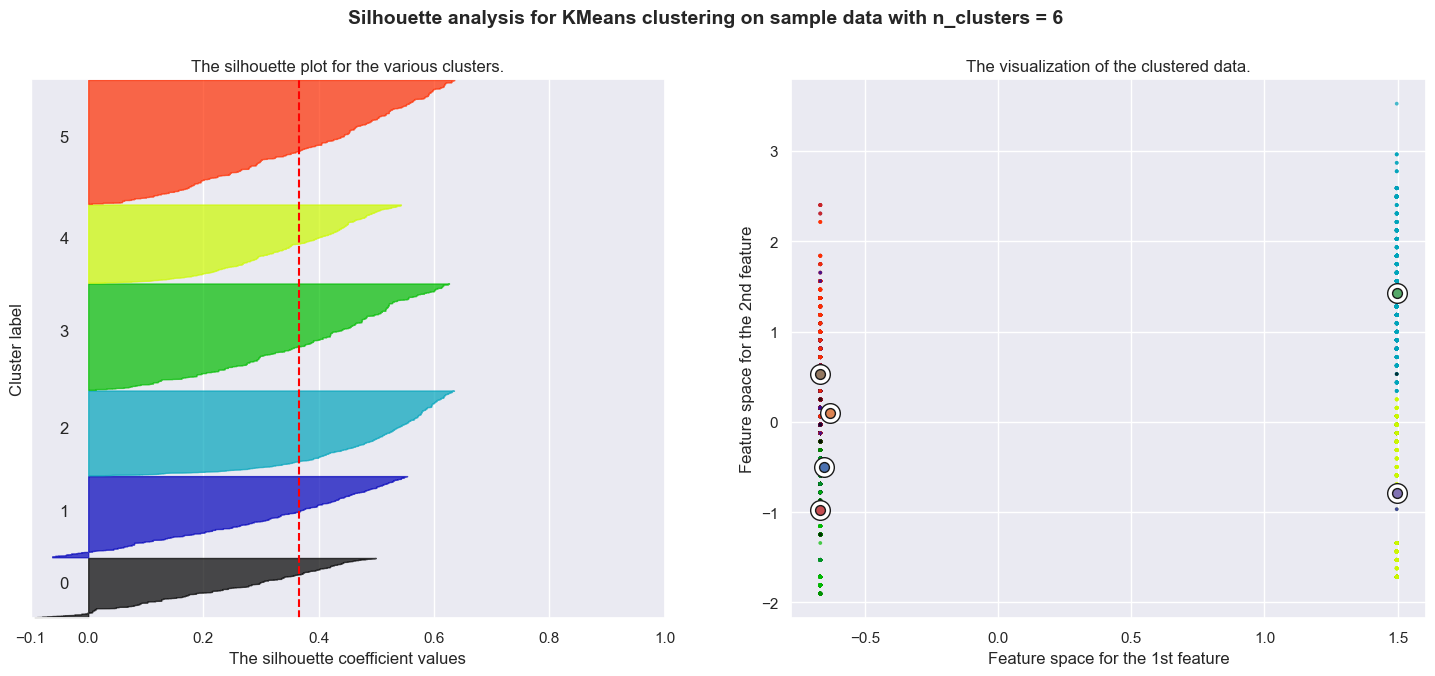

In [113]:

import matplotlib.cm as cm

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="o", alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [114]:

# applying KMeans with K = 2
k_means = KMeans(n_clusters=2, random_state=10)
k_means.fit(X)
y_pred_kmeans = k_means.predict(X)

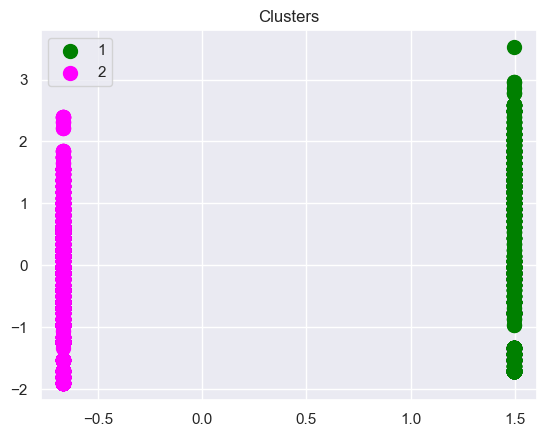

In [115]:
# Visualizing the clusters (two dimensions only)
plt.scatter(X[y_pred_kmeans == 0, 0], X[y_pred_kmeans == 0, 1], s = 100, c = 'green', label = '1')
plt.scatter(X[y_pred_kmeans == 1, 0], X[y_pred_kmeans == 1, 1], s = 100, c = 'magenta', label = '2')
plt.title('Clusters')
plt.legend()
plt.show()

**Hierarchical Clustering**
  
Finding the best possible number of clusters by visualizing dendogram

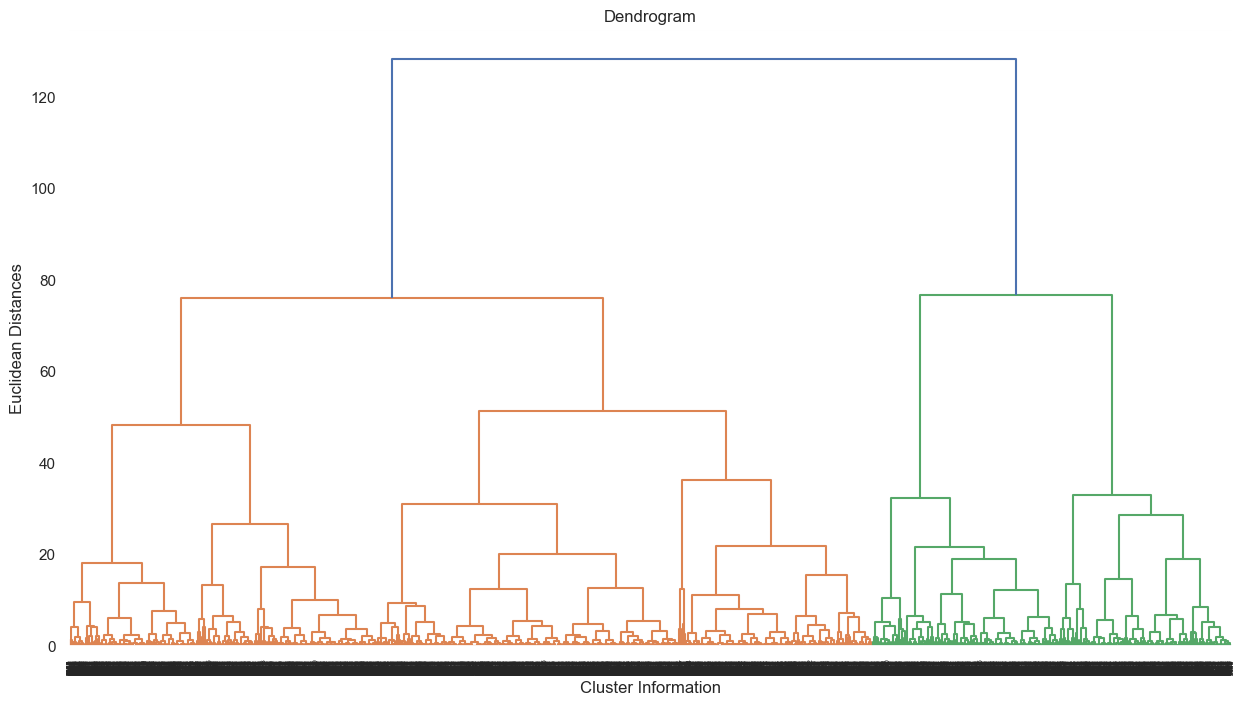

In [116]:
# setting up the figure size
plt.figure(figsize=(15,8))

# visualizing dendogram
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Cluster Information')
plt.ylabel('Euclidean Distances')
plt.show()

**How should we Choose the Number of Clusters in Hierarchical Clustering?**

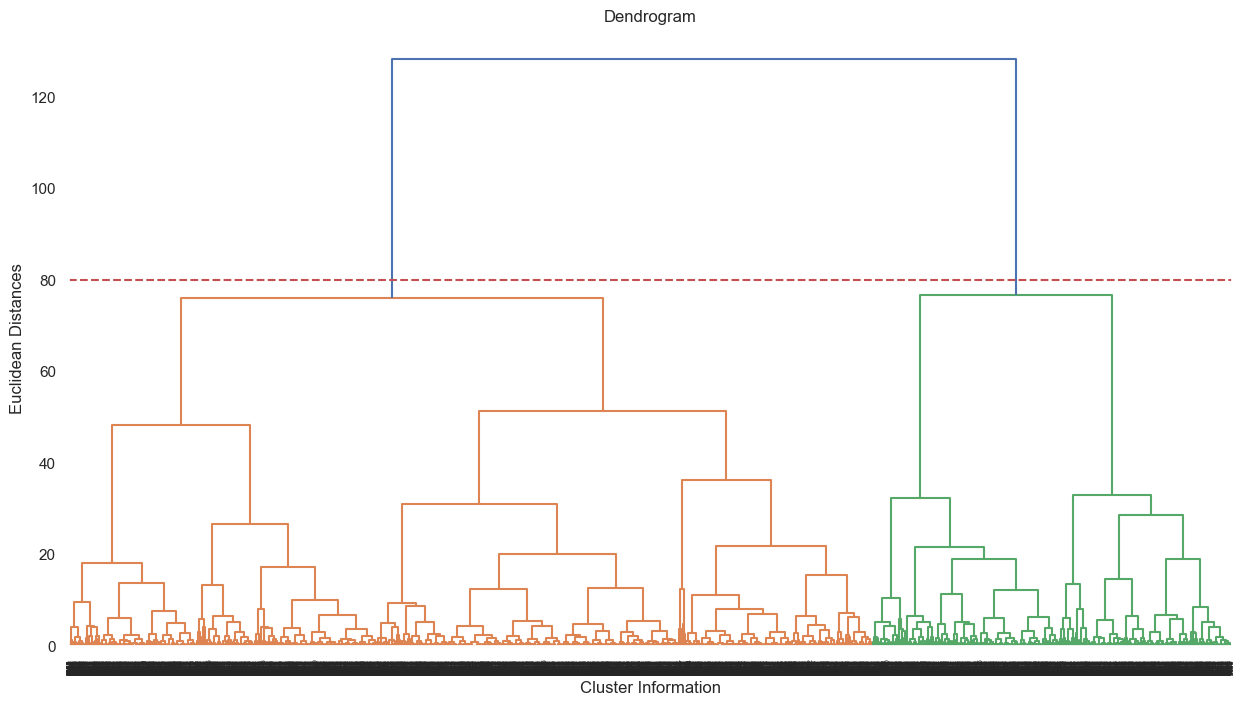

In [117]:

# setting up the figure size
plt.figure(figsize=(15,8))

# visualizing dendogram
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Cluster Information')
plt.ylabel('Euclidean Distances')
plt.axhline(y=80, color='r', linestyle='--')
plt.show()

**The number of clusters will be the number of vertical lines which are being intersected by the line drawn using the threshold.**

No. of Cluster = 2

**Applying Agglomerative Clustering**

In [120]:
# applying aggolomerative clustering
hierarchical_clustering = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
y_pred_agg = hierarchical_clustering.fit_predict(X)

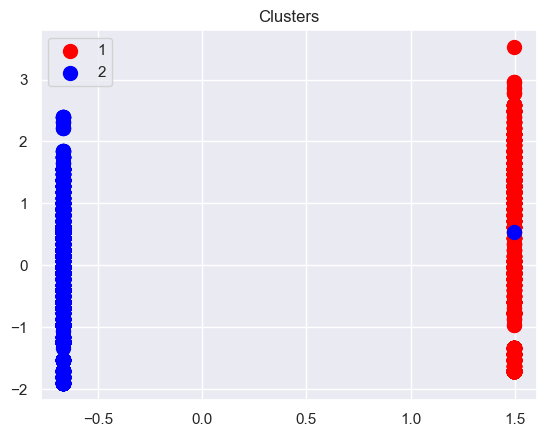

In [121]:

# Visualizing the clusters (two dimensions only)
plt.scatter(X[y_pred_agg == 0, 0], X[y_pred_agg == 0, 1], s = 100, c = 'red', label = '1')
plt.scatter(X[y_pred_agg == 1, 0], X[y_pred_agg == 1, 1], s = 100, c = 'blue', label = '2')
plt.title('Clusters')
plt.legend()
plt.show()

**DBSCAN**

In [123]:

# applying DBSCAN
dbscan = DBSCAN(eps=2, min_samples=2)
y_pred_dbscan = dbscan.fit_predict(X)

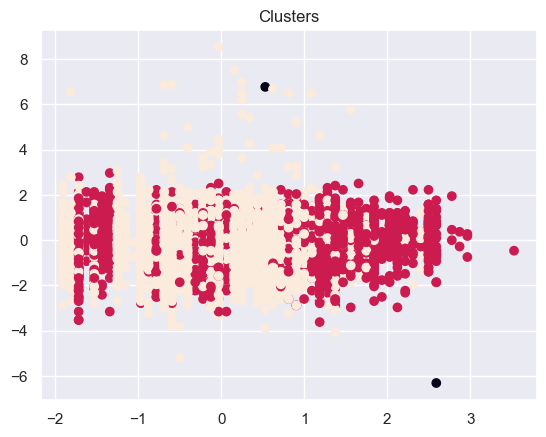

In [124]:

# Visualizing the clusters (two dimensions only)
plt.scatter(X[:, 1], X[:, 2], c = y_pred_dbscan)
plt.title('Clusters')
plt.show()

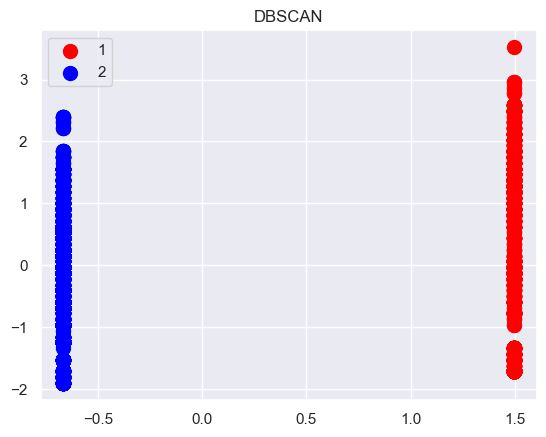

In [125]:

# Visualizing the clusters (two dimensions only)
plt.scatter(X[y_pred_dbscan == 0, 0], X[y_pred_dbscan == 0, 1], s = 100, c = 'red', label = '1')
plt.scatter(X[y_pred_dbscan == 1, 0], X[y_pred_dbscan == 1, 1], s = 100, c = 'blue', label = '2')
plt.title('DBSCAN')
plt.legend()
plt.show()

**Final Conclusion**

**ML Model Conclusion**

**KMeans Clustering :**

Elbow Method ---> K values is 2.
Silhouette Score ---> When the K value is 2, silhouette score is highest ,i.e., 0.42.
So, I applied KMeans clustering with number of clusters = 2.

**Hierarchical Clustering :**

Dendogram ---> No. of Clusters = 2.
So, I applied Agglomerative algorithm with number of clusters = 2.

DBSCAN : I applied DBSCAN with min_samples = 2.

In general, optimal number of cluster is equal to 2.